In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
# pip install wordcloud
from wordcloud import WordCloud

In [27]:
import nltk
import re

In [2]:
# import the data
df = pd.read_parquet("0-324.parquet.gzip")


In [5]:
df.isna().sum().sum()

12

In [10]:
df.groupby(['user_id'])

,username,user_id,text
index,,,
0,3m,378197959.0,@ryaninmpls Sorry to hear of the difficulty! P...
1,3m,378197959.0,3M's #StateOfScience Index found that 87% of p...
2,3m,378197959.0,"@dustinalexander Hi Dustin, thanks for your fe..."
3,3m,378197959.0,@Mohan56925135 Hello - Thank you for reaching ...
4,3m,378197959.0,The world is safer and healthier when people t...
...,...,...,...
85223,sempraenergy,20637451.0,RT @SDGE: ICYMI - @sdut recently profiled the ...
85224,sempraenergy,20637451.0,RT @SoCalGasNews: Jimmie I. Cho has been named...
85225,sempraenergy,20637451.0,RT @SDGE: The winter chill we are experiencing...


In [15]:
df=df.dropna()

In [16]:
df.isna().sum()

username    0
user_id     0
text        0
dtype: int64

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

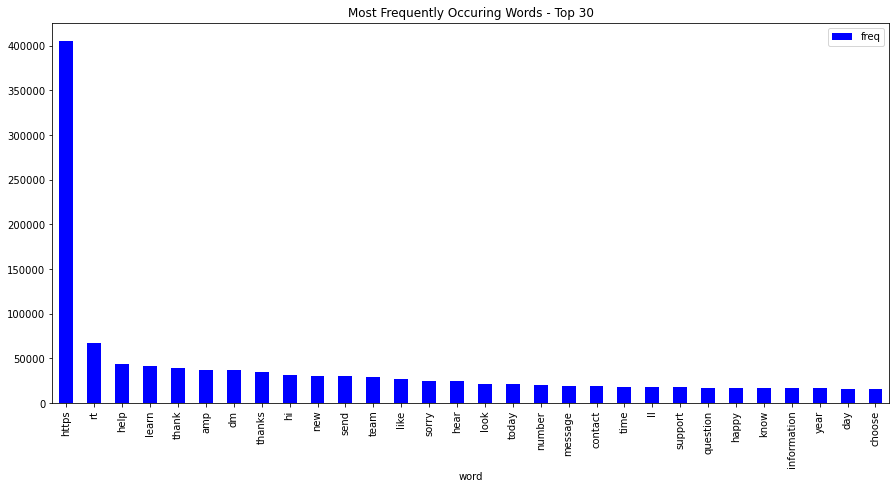

In [17]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

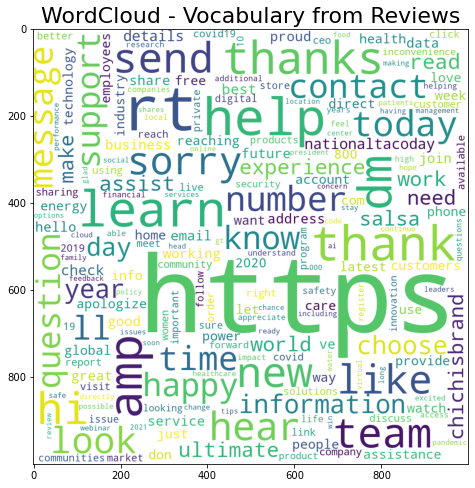

In [21]:
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [28]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [37]:
hashtag = hashtag_extract(df['text'])
ht = [x for x in hashtag if x != []]
ht

[['StateOfScience', 'ScienceBringsHope', 'partner'],
 ['StateOfScience'],
 ['covid19'],
 ['3mfilms'],
 ['StateOfScience'],
 ['STEM', 'in'],
 ['AAPIHeritageMonth'],
 ['StateofScience'],
 ['StateOfScience'],
 ['COVID19'],
 ['StateOfScience'],
 ['StateOfScience'],
 ['StateOfScience'],
 ['StateOfScience'],
 ['StateOfScience'],
 ['StateOfScience'],
 ['StateOfScience'],
 ['improvinglives'],
 ['sustainability'],
 ['sustainability', '3mfilms'],
 ['StateOfScience'],
 ['sustainability'],
 ['sustainability', 'EarthMonth'],
 ['sustainability', 'EarthMonth'],
 ['Sustainability', 'EarthMonth'],
 ['EarthMonth'],
 ['EarthMonth'],
 ['22824444'],
 ['22790377'],
 ['EarthMonth'],
 ['sustainability', 'EarthMonth'],
 ['sustainable'],
 ['EarthDay'],
 ['EarthDay'],
 ['EarthDay', 'sustainable'],
 ['sustainable', 'EarthMonth'],
 ['EarthMonth'],
 ['LifeWith3M'],
 ['LifeWith3M'],
 ['PPE', 'ImprovingLives'],
 ['science', '3mdichroic', 'dichroicfilm', 'dichroicglass', '3mfilms'],
 ['TBT'],
 ['WorldHealthDay'],
 ['L

In [38]:
distr_hash = nltk.FreqDist(ht)
df_hash = pd.DataFrame({'Hashtag': list(distr_hash.keys()),
                  'Count': list(distr_hash.values())})

# selecting top 20 most frequent hashtags     
df_hash = df_hash.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df_hash, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

TypeError: unhashable type: 'list'